(HW2_2024)=
# HW2

**Deadline:** 03.11.2024 23:59 (GMT+5).

In this task you are suggested to implement gradient descent and Newton's optimization methods, and investigate their performance for three types of functions:

* quadratic function
* loss function of linear regression
* loss function of logistic regression

`BaseSmoothOracle` is an abstract class for objective function $f$ (**oracle**). Each concrete oracle must inherit this class, implementing four methods:

* `func(x)` calculates $f(\boldsymbol x)$
* `grad(x)` calculates $\nabla f(\boldsymbol x)$
* `hess(x)` calculates $\nabla^2 f(\boldsymbol x)$
* `get_opt(x)` calculates point of minimum by direct formula (works only for quadratic and linear regression oracles)

In [1]:
class BaseSmoothOracle(object):
    """
    Base class for implementation of oracles.
    """
    def func(self, x):
        """
        Computes the value of function at point x.
        """
        raise NotImplementedError('Func oracle is not implemented.')

    def grad(self, x):
        """
        Computes the gradient at point x.
        """
        raise NotImplementedError('Grad oracle is not implemented.')
    
    def hess(self, x):
        """
        Computes the Hessian matrix at point x.
        """
        raise NotImplementedError('Hessian oracle is not implemented.')
        
    def get_opt(self):
        """
        Computes the point x at which minimum is attained
        """
        raise NotImplementedError('True solution is unavailable.')

## Quadratic oracle

### Task 2.1 (1 point)

Implement quadratic oracle

```{math}
:label: quadratic-oracle
    f(\boldsymbol x) = \frac 12 \boldsymbol x^\mathsf{T} \boldsymbol{Ax} - \boldsymbol b^\mathsf{T} \boldsymbol x, \quad \boldsymbol A^\mathsf{T}  = \boldsymbol A \in \mathbb R^{n\times n}, \quad \boldsymbol b\in\mathbb R^n
```

<!-- Let $\boldsymbol A$ be a symmetric positive definite matrix. Solve the optimization task

$$
    f(\boldsymbol x) = \frac 12 \boldsymbol x^\mathsf{T} \boldsymbol{Ax} - \boldsymbol b^\mathsf{T}\boldsymbol x \to \min\limits_{\boldsymbol x \in \mathbb R^n}
$$

analytically. Namely, -->

Namely,

* find solution $\boldsymbol x_*$ of the equation $\nabla f(\boldsymbol x) = \boldsymbol 0$ 
* find hessian $\nabla^2 f$ and show that $\nabla^2 f(\boldsymbol x_*)$ is positive definite
* prove that $\boldsymbol x_*$ is the point of global minimum of $f$
* finally, fill the gaps in cell below

In [2]:
import numpy as np

class QuadraticOracle(BaseSmoothOracle):
    """
    Oracle for quadratic function:
       func(x) = 1/2 x^TAx - b^Tx.
    """

    def __init__(self, A, b):
        if not np.allclose(A, A.T):
            raise ValueError('A should be a symmetric matrix.')
        self.A = A
        self.b = b

    def func(self, x):
        # YOUR CODE HERE
        return 0.5 * np.dot(x.T, np.dot(self.A, x)) - np.dot(self.b.T, x)

    def grad(self, x):
        # YOUR CODE HERE
        return np.dot(self.A, x) - self.b

    def hess(self, x):
        # YOUR CODE HERE
        return self.A
    
    def get_opt(self):
        # YOUR CODE HERE
        if np.linalg.det(self.A) == 0:
            raise ValueError("Matrix A is singular and cannot be inverted.")
        return np.linalg.solve(self.A, self.b)

Plot levels of the quadraric oracle in 2-dimensional case using the following function:

In [3]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

def plot_levels(func, xrange=None, yrange=None, levels=None):
    """
    Plotting the contour lines of the function.

    Example:
    --------
    >> oracle = QuadraticOracle(np.array([[1.0, 2.0], [2.0, 5.0]]), np.zeros(2))
    >> plot_levels(oracle.func)
    """
    if xrange is None:
        xrange = [-6, 6]
    if yrange is None:
        yrange = [-5, 5]
    if levels is None:
        levels = [0, 0.25, 1, 4, 9, 16, 25]
        
    x = np.linspace(xrange[0], xrange[1], 100)
    y = np.linspace(yrange[0], yrange[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros(X.shape)
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            Z[i, j] = func(np.array([X[i, j], Y[i, j]]))

    CS = plt.contour(X, Y, Z, levels=levels, colors='k')
    plt.clabel(CS, inline=1, fontsize=8) 
    plt.grid()   

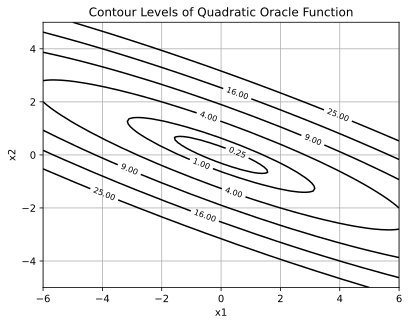

In [4]:
A = np.array([[1.0, 2.0], [2.0, 5.0]])
b = np.zeros(2)  # Вектор b из нулей для простоты
oracle = QuadraticOracle(A, b)

plot_levels(oracle.func)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Contour Levels of Quadratic Oracle Function")
plt.show()

## Linear regression oracle

### Task 2.2 (1.5 points)

Implement linear regression oracle

$$
    f(\boldsymbol x) = \frac 1m \Vert \boldsymbol{Ax} - \boldsymbol b\Vert_2^2, \quad \boldsymbol A \in \mathbb R^{m\times n}, \quad \boldsymbol b \in \mathbb R^n.
$$

Namely,

* find $\nabla f(\boldsymbol x)$
* find $\nabla^2 f(\boldsymbol x)$
* find analytic solution of the minimization problem $f(\boldsymbol x) \to \min\limits_{\boldsymbol x}$
* finally, fill the gaps in the next cell

In [5]:
class LinRegOracle(BaseSmoothOracle):
    """
    Oracle for linear regression:
       func(x) = 1/m ||Ax - b||^2.
    """

    def __init__(self, A, b):
        self.A = A
        self.b = b

    def func(self, x):
        # YOUR CODE HERE
        residual = self.A @ x - self.b
        return (1 / self.A.shape[0]) * np.dot(residual, residual)

    def grad(self, x):
        # YOUR CODE HERE
        return (2 / self.A.shape[0]) * self.A.T @ (self.A @ x - self.b)

    def hess(self, x):
        # YOUR CODE HERE
        return (2 / self.A.shape[0]) * self.A.T @ self.A
    
    def get_opt(self):
        # YOUR CODE HERE
        return np.linalg.solve(self.A.T @ self.A, self.A.T @ self.b)

## Logistic regression oracle

### Task 2.3 (1.5 point)

Implement logistic regression oracle

```{math}
:label: log-reg-oracle
    f(\boldsymbol x) = \frac 1m \sum_{i=1}^m \log\big(1 + \exp(-b_i\boldsymbol a_i^\mathsf{T} \boldsymbol x)\big) + \frac C2\Vert \boldsymbol x\Vert_2^2
```

Namely, denote

$$
    \boldsymbol A = \begin{pmatrix} a_1^\mathsf{T} \\
    a_2^\mathsf{T} \\
    \vdots\\
    a_m^\mathsf{T}
    \end{pmatrix} \in \mathbb R^{m\times n}, \quad
    \boldsymbol b = \begin{pmatrix} b_1 \\
    b_2\\
    \vdots\\
    b_m
    \end{pmatrix}\in \mathbb R^m,
    \quad
    \boldsymbol x = \begin{pmatrix} x_1 \\
    x_2\\
    \vdots\\
    x_n
    \end{pmatrix}\in \mathbb R^n,
$$

and then

* find the gradient $\nabla f(\boldsymbol x)$ and hessian $\nabla^2 f(\boldsymbol x)$ of logistic regression oracle {eq}`log-reg-oracle` in matrix-vector form
* fill the gaps in the cell below 

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from scipy.special import expit

class LogRegOracle(BaseSmoothOracle):
    """
    Oracle for logistic regression.
    """

    def __init__(self, A, b, regcoef=1):
        self.A = A
        self.b = b
        self.C = regcoef

    def func(self, x):
        # YOUR CODE HERE
        linear_terms = self.b * (self.A @ x)
        return (1 / self.A.shape[0]) * np.sum(np.log(1 + np.exp(-linear_terms))) + (self.C / 2) * np.dot(x, x)

    def grad(self, x):
        # YOUR CODE HERE
        linear_terms = self.b * (self.A @ x)
        sigmoid_terms = expit(-linear_terms)
        grad = -(1 / self.A.shape[0]) * self.A.T @ (self.b * sigmoid_terms) + self.C * x
        return grad

    def hess(self, x):
        # YOUR CODE HERE
        linear_terms = self.b * (self.A @ x)
        sigmoid_terms = expit(-linear_terms)
        D = np.diag(sigmoid_terms * (1 - sigmoid_terms))
        hessian = (1 / self.A.shape[0]) * self.A.T @ D @ self.A + self.C * np.eye(x.size)
        return hessian 
    
    def get_opt(self):
        """
        Since there is no analytic solution for the optimal weights of logistic regression, 
        here we have to cheat a bit
        """
        LR = LogisticRegression(fit_intercept=False, C= 1./self.C/self.A.shape[0])
        LR.fit(self.A, (self.b + 1) / 2)
        return LR.coef_[0]

## Gradient descent

Given a starting point $\boldsymbol x_0 \in\mathbb R^n$ and learning rate $\eta > 0$, iteratively calculate

$$
    \boldsymbol x_{k+1} = \boldsymbol x_k - \eta \nabla f(\boldsymbol x_k), \quad k = 0, 1,\ldots
$$

The process should stop when either $k = \mathrm{max\_iter}$ or 

$$
\Vert \nabla f(\boldsymbol x_k)\Vert_2^2 \leqslant \varepsilon \Vert \nabla f(\boldsymbol x_0)\Vert_2^2
$$

where $\varepsilon > 0$ is tolerance.

### Task 2.4 (1 point)

Complete the implementation of gradient descent algorithm.

In [7]:
from datetime import datetime
from collections import defaultdict

def gradient_descent(oracle, x_0, learning_rate, tolerance=1e-5, max_iter=10000,
                     trace=False, display=False):
    """
    Gradient descent optimization method.

    Parameters
    ----------
    oracle : BaseSmoothOracle-descendant object
        Oracle with .func(), .grad() and .hess() methods implemented for computing
        function value, its gradient and Hessian respectively.
    x_0 : np.array
        Starting point for optimization algorithm.
    learning_rate : float
        Learning rate.
    tolerance : float
        Epsilon value for stopping criterion.
    max_iter : int
        Maximum number of iterations.
    trace : bool
        If True, the progress information is appended into history dictionary during training.
        Otherwise None is returned instead of history.
    display : bool
        If True, debug information is displayed during optimization.
        Printing format and is up to a student and is not checked in any way.

    Returns
    -------
    x_star : np.array
        The point found by the optimization procedure
    message : string
        "success" or the description of error:
            - 'iterations_exceeded': if after max_iter iterations of the method x_k still doesn't satisfy
                the stopping criterion.
            - 'computational_error': in case of getting Infinity or None value during the computations.
    history : dictionary of lists or None
        Dictionary containing the progress information or None if trace=False.
        Dictionary has to be organized as follows:
            - history['time'] : list of floats, containing time in seconds passed from the start of the method
            - history['func'] : list of function values f(x_k) on every step of the algorithm
            - history['grad_norm'] : list of values Euclidian norms ||g(x_k)|| of the gradient on every step of the algorithm
            - history['x'] : list of np.arrays, containing the trajectory of the algorithm. ONLY STORE IF x.size <= 2

    Example:
    --------
    >> oracle = QuadraticOracle(np.eye(5), np.arange(5))
    >> x_opt, message, history = gradient_descent(oracle, np.zeros(5))
    >> print('Found optimal point: {}'.format(x_opt))
       Found optimal point: [ 0.  1.  2.  3.  4.]
    """
    history = defaultdict(list) if trace else None
    x_k = np.copy(x_0)
    grad_at_x_0 = oracle.grad(x_0)

    INF = 1e100
    start_time = datetime.now()

    for i in range(max_iter + 1):     
        grad_at_x_k = oracle.grad(x_k)
        if np.any(np.abs(x_k) > INF) or np.any(np.abs(grad_at_x_k) > INF):
            return x_k, 'computational_error', history

        if trace:
            history['time'].append((datetime.now() - start_time).microseconds * 1e-6)
            history['func'].append(oracle.func(x_k))
            history['grad_norm'].append(np.linalg.norm(grad_at_x_k))
            if x_k.shape[0] <= 2:
                history['x'].append(np.array(x_k))

        if display:
            print("iteration {}: |x_k-x_0| = {}, f(x_k) = {}, |grad(f(x_k))| = {}".format(
                i, np.linalg.norm(x_k - x_0), oracle.func(x_k), np.linalg.norm(grad_at_x_k))
            )

        # YOUR CODE HERE
        x_k -= learning_rate * grad_at_x_k

        if np.linalg.norm(grad_at_x_k) ** 2 <= tolerance * np.linalg.norm(grad_at_x_0) ** 2:
            return x_k, 'success', history

    return x_k, 'iterations_exceeded', history

Now it's try to test gradient descent algorithm on different tasks. Here is some auxiliary code for visualization.

In [8]:
import colorsys

def get_color_array(size):
    HSV_tuples = [(float(i) / size, 1.0, 1.0) for i in range(size)]
    RGB_tuples = list(map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples))
    return np.array(RGB_tuples)

def plot_2d(history, oracle, x_0, x_opt, scale, title, n_levels=3, xlims=None, ylims=None, bound=None):
    if bound is not None:
        history['x'] = history['x'][:bound]
    hist_x = np.array(history['x']).T
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    
    plt.plot(np.linalg.norm(hist_x - x_opt[:, None], axis=0), c='c', linewidth=3)
    plt.plot(history['grad_norm'], c='m', linewidth=2)
    plt.xlim(0, len(history['grad_norm']) - 1)
    plt.ylim(0, 2)
    plt.title(title)
    plt.ylabel('Gradients/residuals norm')
    plt.xlabel('Iteration')
    plt.legend(['Residuals', 'Gradients'])
    plt.grid(ls=":")
    
    plt.subplot(122)
    if xlims is not None:
        x_range = xlims
    else:
        x_range = [x_opt[0] - scale, x_opt[0] + scale]
    if ylims is not None:
        y_range = ylims
    else:
        y_range = [x_opt[1] - scale, x_opt[1] + scale]
    func_opt = oracle.func(x_opt)
    levels = [func_opt + 0.25 * scale / n_levels * i for i in range(1, 4*n_levels + 1, 4)]
    # sizes = np.minimum(5 * float(hist_x.shape[1]) / (np.arange(1, hist_x.shape[1] + 1)), 20)
    plt.scatter(hist_x[0], hist_x[1], s=8, c=get_color_array(hist_x.shape[1]))
    plt.plot(hist_x[0], hist_x[1], alpha=0.6, ls="--", c='r')
    # plt.plot(hist_x[0], hist_x[1], c='r', linewidth=3)
    plt.scatter(x_opt[0], x_opt[1], marker='s', c='r', edgecolors='k')
    plot_levels(oracle.func, xrange=x_range, yrange=y_range, levels=levels)
    plt.title('Trajectory')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(ls=":")
    if xlims is not None:
        plt.xlim(xlims)
    if ylims is not None:
        plt.ylim(ylims)
    plt.show()

def test_2d(method, oracle, x_0, lr, tol=1e-5, scale=1.0, xlims=None, ylims=None, bound=None):
    x_opt = oracle.get_opt()
    if method == 'gd':
        x_star, msg, history = gradient_descent(
            oracle, x_0, lr, tol, trace=True
        )
    elif method == 'newton':
        x_star, msg, history = newton(
            oracle, x_0, lr, tol, trace=True
        )
    else:
        raise ValueError("Unknown error")
    print(msg, len(history['grad_norm']), "iterations")
    plot_2d(history, oracle, x_0, x_opt, scale, 'lr = {}'.format(lr), xlims=xlims, ylims=ylims, bound=bound)

Take a simple quadratic function

$$
    f(x, y) = 2x^2 + 4xy + 5 y^2
$$

which ovbiously has minimum at $(0, 0)$. Now run gradient descent method with $\eta = 0.01$, starting from point $(-2, -1)$:

success 367 iterations


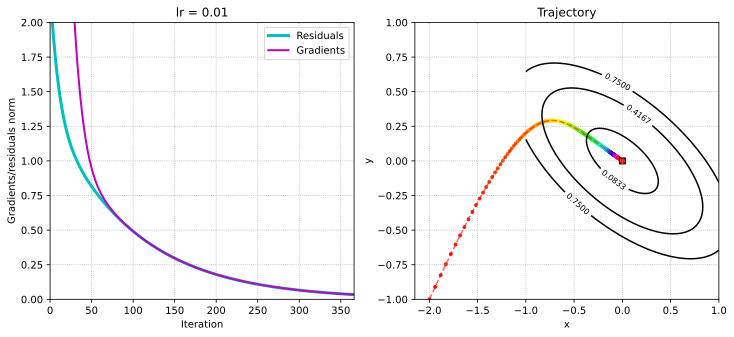

In [9]:
import numpy as np

A = np.array([[2, 2], [2, 5]])
b = np.zeros(2)
q_oracle = QuadraticOracle(A, b)
test_2d("gd", q_oracle, np.array([-2.0, -1.0]), lr=0.01)

If you did all correctly, gradient descent should converge here to optimal point. But this is not always the case:

* if $\eta$ is very small, convergence could be too slow
* if $\eta$ is very big, than gradient descent often diverges

### Task 2.5 (1 point)

Take previous quadratic oracle and try different learning rates and starting points. Find the smallest and the largest learning rates for which gradient descent is still convergent. Provide some characteristic plots. Also, plot a graph of required iterations versus $\eta$.

### GD for linear regression

Let's try it for simple linear regression. Here is a toy example:

success 282 iterations


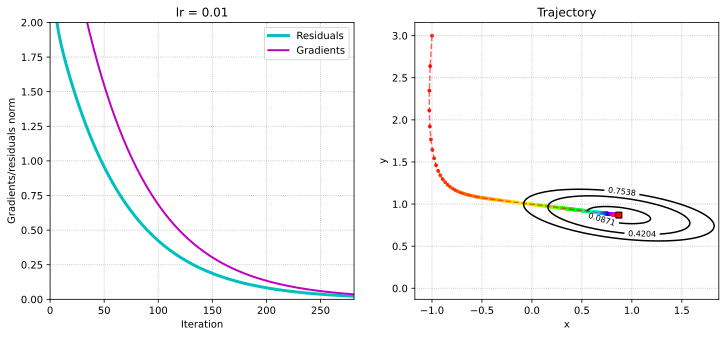

In [10]:
A = np.array([[1, -2.1], [1, 1.2], [1, 4.8]])
b = np.array([-1, 2, 5])
oracle = LinRegOracle(A, b)
test_2d("gd", oracle, np.array([-1, 3.0]), lr=0.01, tol=1e-6)

### Task 2.6 (0.5 points)

Apply gradient descent algorithm to simple linear regression trained on `boston` dataset. Take `lstat` as feature, `medv` as target. Provide some visualizations.

In [16]:
import pandas as pd
boston = pd.read_csv("BostonHousing.csv").drop("Unnamed: 0", axis=1)
# YOUR CODE HERE
if 'Unnamed: 0' in boston.columns:
    boston = boston.drop("Unnamed: 0", axis=1)
A = boston[['lstat']].values  # Признак
b = boston['medv'].values     # Целевая переменная

# Масштабирование данных
scaler = StandardScaler()
A_scaled = scaler.fit_transform(A)

# Применение градиентного спуска
oracle = LinRegOracle(A_scaled, b)
test_2d("gd", oracle, np.zeros(A_scaled.shape[1]), lr=0.01)

KeyError: "['Unnamed: 0'] not found in axis"

### GD for logistic regression

The targets must be from $\{-1, 1\}$. One more toy example:

In [ ]:
A = np.array([[1, -2.1], [1, 1.2], [1, 4.8], [1, 3.4]])
b = np.array([-1, 1, 1, 1])
oracle = LogRegOracle(A, b)
test_2d("gd", oracle, np.array([1., 2.0]), lr=0.01, tol=1e-6)

### Task 2.7 (0.5 points)

Train simple logistic regression model on `breast_cancer` dataset using your gradient descent method. Take any feature from the dataset. Visualize the results.

In [ ]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
y = breast['target']
y[y == 0] = -1

# YOUR CODE HERE
# Масштабирование данных
scaler = StandardScaler()
A_scaled = scaler.fit_transform(A)

# Применение градиентного спуска
oracle = LogRegOracle(A_scaled, b, regcoef=1)
test_2d("gd", oracle, np.zeros(A_scaled.shape[1]), lr=0.01)

## Newton's method

Given a starting point $\boldsymbol x_0 \in\mathbb R^n$ and learning rate $\eta > 0$, iteratively calculate

$$
    \boldsymbol x_{k+1} = \boldsymbol x_k - \eta \big(\nabla^2 f(\boldsymbol x_k)\big)^{-1} \nabla f(\boldsymbol x_k), \quad k = 0, 1,\ldots
$$

The process should stop when either $k = \mathrm{max\_iter}$ or 

$$
\Vert \nabla f(\boldsymbol x_k)\Vert_2^2 \leqslant \varepsilon \Vert \nabla f(\boldsymbol x_0)\Vert_2^2
$$

where $\varepsilon > 0$ is tolerance.

### Task 2.8 (1 point)

Complete the implementation of Newton's method.

In [15]:
import scipy

def newton(oracle, x_0, learning_rate, tolerance=1e-5, max_iter=100, trace=False, display=False):
    """
    Newton's optimization method.

    Parameters
    ----------
    oracle : BaseSmoothOracle-descendant object
        Oracle with .func(), .grad() and .hess() methods implemented for computing
        function value, its gradient and Hessian respectively. If the Hessian
        returned by the oracle is not positive-definite method stops with message="newton_direction_error"
    x_0 : np.array
        Starting point for optimization algorithm
    learning_rate : float
        Learning rate.
    tolerance : float
        Epsilon value for stopping criterion.
    max_iter : int
        Maximum number of iterations.
    trace : bool
        If True, the progress information is appended into history dictionary during training.
        Otherwise None is returned instead of history.
    display : bool
        If True, debug information is displayed during optimization.

    Returns
    -------
    x_star : np.array
        The point found by the optimization procedure
    message : string
        'success' or the description of error:
            - 'iterations_exceeded': if after max_iter iterations of the method x_k still doesn't satisfy
                the stopping criterion.
            - 'newton_direction_error': in case of failure of solving linear system with Hessian matrix (e.g. non-invertible matrix).
            - 'computational_error': in case of getting Infinity or None value during the computations.
    history : dictionary of lists or None
        Dictionary containing the progress information or None if trace=False.
        Dictionary has to be organized as follows:
            - history['time'] : list of floats, containing time passed from the start of the method
            - history['func'] : list of function values f(x_k) on every step of the algorithm
            - history['grad_norm'] : list of values Euclidian norms ||g(x_k)|| of the gradient on every step of the algorithm
            - history['x'] : list of np.arrays, containing the trajectory of the algorithm. ONLY STORE IF x.size <= 2

    Example:
    --------
    >> oracle = QuadraticOracle(np.eye(5), np.arange(5))
    >> x_opt, message, history = newton(oracle, np.zeros(5), line_search_options={'method': 'Constant', 'c': 1.0})
    >> print('Found optimal point: {}'.format(x_opt))
       Found optimal point: [ 0.  1.  2.  3.  4.]
    """
    history = defaultdict(list) if trace else None
    x_k = np.copy(x_0)
    grad_at_x_0 = oracle.grad(x_0)

    INF = 1e100
    start_time = datetime.now()

    for i in range(max_iter + 1): 
        grad_at_x_k = oracle.grad(x_k)
        hess_at_x_k = oracle.hess(x_k)  

        if np.any(np.abs(x_k) > INF) or np.any(np.abs(grad_at_x_k) > INF):
            return x_k, 'computational_error', history

        if trace:
            history['time'].append((datetime.now() - start_time).seconds)
            history['func'].append(oracle.func(x_k))
            history['grad_norm'].append(np.linalg.norm(grad_at_x_k))
            if x_k.shape[0] <= 2:
                history['x'].append(np.array(x_k))

        if display:
            print("iteration {}: |x_k-x_0| = {}, f(x_k) = {}, |grad(f(x_k))| = {}".format(
                i, np.linalg.norm(x_k - x_0), oracle.func(x_k), np.linalg.norm(grad_at_x_k))
            )

        # YOUR CODE HERE
        try:
            newton_step = np.linalg.solve(hess_at_x_k, grad_at_x_k)
        except np.linalg.LinAlgError:
            return x_k, 'newton_direction_error', history
        
        x_k -= learning_rate * newton_step

        if np.linalg.norm(grad_at_x_k) ** 2 <= tolerance * np.linalg.norm(grad_at_x_0) ** 2:
            return x_k, 'success', history

    return x_k, 'iterations_exceeded', history

### Task 2.9 (1 point)

Apply Newton's methods to the previous tasks:

* quadratic function
* simple linear regression trained on `boston` dataset
* simple logistic regression trained on `breast_cancer` dataset

Compare the number of iterations and time execution of GD and Newton methods in this examples. Visualize your results.

Метод Ньютона для квадратичной функции:
success 2 iterations


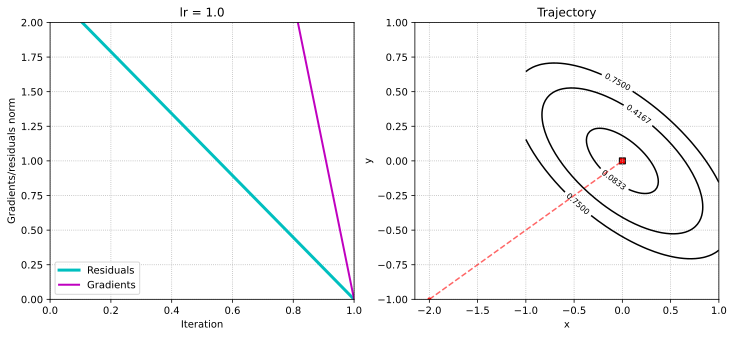


Метод Ньютона для линейной регрессии (Boston):
success 2 iterations


IndexError: index 1 is out of bounds for axis 0 with size 1

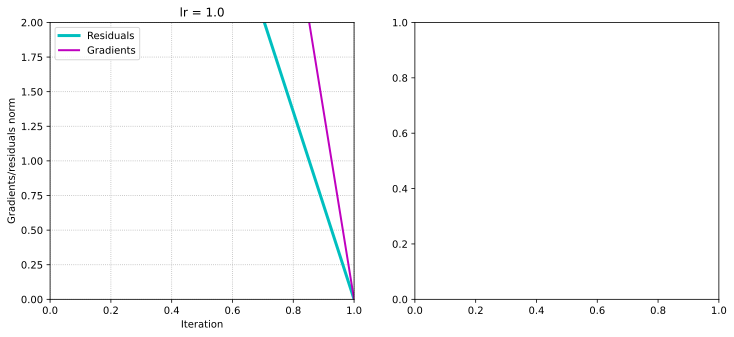

In [19]:
# YOUR CODE HERE
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Квадратичная функция
A_quad = np.array([[2, 2], [2, 5]])
b_quad = np.zeros(2)
q_oracle = QuadraticOracle(A_quad, b_quad)

print("Метод Ньютона для квадратичной функции:")
test_2d("newton", q_oracle, np.array([-2.0, -1.0]), lr=1.0, tol=1e-6)

# 2. Линейная регрессия на наборе данных Boston
boston = pd.read_csv("BostonHousing.csv")
A_boston = boston[['lstat']].values  # Признак
b_boston = boston['medv'].values     # Целевая переменная
scaler = StandardScaler()
A_boston_scaled = scaler.fit_transform(A_boston)
lin_reg_oracle = LinRegOracle(A_boston_scaled, b_boston)

print("\nМетод Ньютона для линейной регрессии (Boston):")
test_2d("newton", lin_reg_oracle, np.zeros(A_boston_scaled.shape[1]), lr=1.0, tol=1e-6)

# 3. Логистическая регрессия на наборе данных breast_cancer
breast = load_breast_cancer()
A_breast = breast['data'][:, :1]  # Первый признак
b_breast = breast['target']
b_breast[b_breast == 0] = -1  # Преобразуем метки в {-1, 1}
A_breast_scaled = scaler.fit_transform(A_breast)
log_reg_oracle = LogRegOracle(A_breast_scaled, b_breast, regcoef=1)

print("\nМетод Ньютона для логистической регрессии (breast_cancer):")
test_2d("newton", log_reg_oracle, np.zeros(A_breast_scaled.shape[1]), lr=1.0, tol=1e-6)

## GD vs Newton

### Task 2.10 (1 point)

Run both gradient descent and Newton's methods on **full** `boston` and `breast_cancer` datasets. Do they converge? How many iterations are required for convergence? How much time? Justify your answers by numeric experiments and visualizations.

Градиентный спуск для линейной регрессии на полном наборе данных Boston:
iterations_exceeded 10001 iterations


IndexError: index 0 is out of bounds for axis 0 with size 0

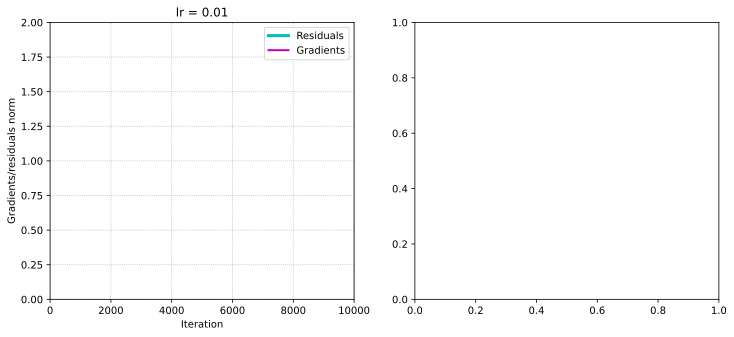

In [20]:
# Задача 2.10: Сравнение GD и Ньютона на полных данных

# Линейная регрессия на полном наборе данных Boston
A_boston_full = boston.drop("medv", axis=1).values  # Все признаки
b_boston_full = boston["medv"].values               # Целевая переменная
A_boston_full_scaled = scaler.fit_transform(A_boston_full)
lin_reg_oracle_full = LinRegOracle(A_boston_full_scaled, b_boston_full)

print("Градиентный спуск для линейной регрессии на полном наборе данных Boston:")
test_2d("gd", lin_reg_oracle_full, np.zeros(A_boston_full_scaled.shape[1]), lr=0.01, tol=1e-6)

print("\nМетод Ньютона для линейной регрессии на полном наборе данных Boston:")
test_2d("newton", lin_reg_oracle_full, np.zeros(A_boston_full_scaled.shape[1]), lr=1.0, tol=1e-6)

# Логистическая регрессия на полном наборе данных breast_cancer
A_breast_full = breast["data"]  # Все признаки
b_breast_full = breast["target"]
b_breast_full[b_breast_full == 0] = -1  # Преобразуем метки в {-1, 1}
A_breast_full_scaled = scaler.fit_transform(A_breast_full)
log_reg_oracle_full = LogRegOracle(A_breast_full_scaled, b_breast_full, regcoef=1)

print("\nГрадиентный спуск для логистической регрессии на полном наборе данных breast_cancer:")
test_2d("gd", log_reg_oracle_full, np.zeros(A_breast_full_scaled.shape[1]), lr=0.01, tol=1e-6)

print("\nМетод Ньютона для логистической регрессии на полном наборе данных breast_cancer:")
test_2d("newton", log_reg_oracle_full, np.zeros(A_breast_full_scaled.shape[1]), lr=1.0, tol=1e-6)
